<a href="https://colab.research.google.com/github/mewerton/MLPRegressor_Artificial_Neural_Resonance/blob/main/MLP_RegressorRessonancia_MW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Tarefa 1 - Prática - Bloco 3***


**Aluno: Mewerton de Melo Silva**

Multi-layer Perceptron Regressor (MLPRegressor) - Exercício - Ressonância

In [55]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab
import seaborn as sns # Seaborn é uma biblioteca de visualização de dados Python baseada em matplotlib.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregamento e Organização Inicial do Dataset

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316


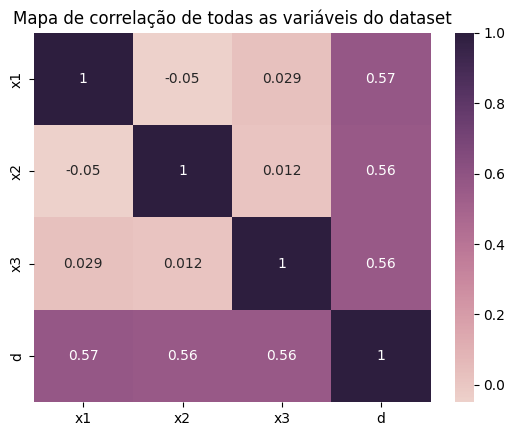

In [56]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Redes_Naurais/ressonanciaMLP.csv") # Carregamento do dataset via Pandas

# Gera um gráfico matricial para apresentar a correção entre as variáveis de entrada do dataset
ax = sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
ax.set_title('Mapa de correlação de todas as variáveis do dataset')
ax=ax

df.head()

Pré-Processamento dos Dados

In [57]:
x = df.drop('d', axis=1) # Exclusão da variável das entradas
y = df['d'] # Inclusão da variável no vetor de saídas desejadas

# Padronização de dados
scaler = StandardScaler().fit(x) # Cria o modelo para o ajuste
x = scaler.transform(x) # Aplica a padronização no dataset de treinamento baseado nos dados de treinamento

Aplicação do MLPRegressor

In [58]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(30), activation='relu', solver='adam', alpha=0.01,
                       max_iter=5000, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10) # Deve variar os parâmetros conforme solicita o enunciado

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(x, y)

print("Função de Ativação Saída: ", mlp_reg.out_activation_)
print("Épocas no Treinamento: ", mlp_reg.n_iter_)
print("Perda Final: ", mlp_reg.loss_)

Função de Ativação Saída:  identity
Épocas no Treinamento:  874
Perda Final:  0.0006043586396567742


Avaliação do Erro no Processo de Treinamento

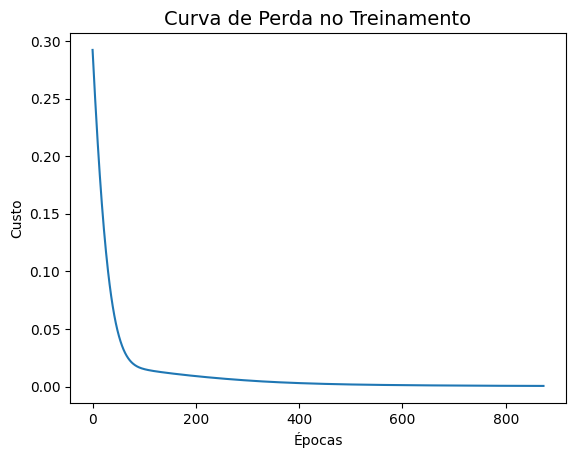

In [59]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

Avaliação do Modelo com a Próprias Amostras Treinadas

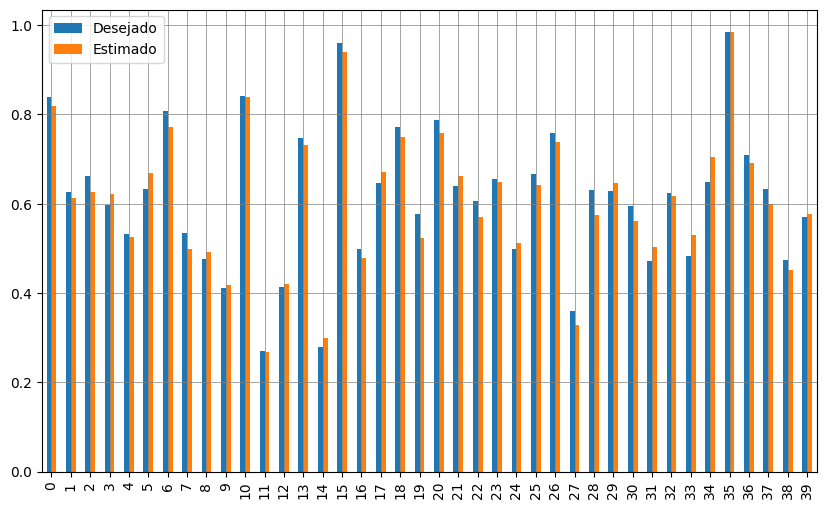

In [60]:
y_pred = mlp_reg.predict(x)

df_temp = pd.DataFrame({'Desejado': y, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Resumo das Métricas

In [61]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2 Score: ', metrics.r2_score(y, y_pred))

Mean Absolute Error (MAE): 0.0218450574148936
Mean Squared Error (MSE): 0.0007716760590435018
Root Mean Squared Error (RMSE): 0.027779057922174066
Mean Absolute Percentage Error (MAPE): 0.04038774780180516
R2 Score:  0.9762934150736826


**Validando o Modelo Treinado com Amostras não Treinadas - Questão 3**

Mean Absolute Error (MAE): 0.03426155156934851
Mean Squared Error (MSE): 0.0016996064034184785
Root Mean Squared Error (RMSE): 0.041226282920225524
Mean Absolute Percentage Error (MAPE): 0.05906975239754941
R2 Score:  0.9212506307469666



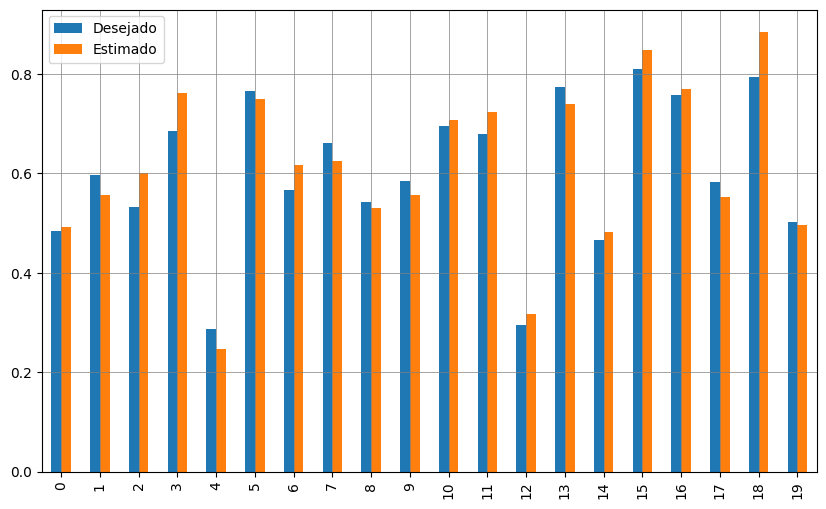

In [62]:
# Caminho do dataset no Google Drive que será carregado em df2 para validar o exercício
df2 = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Redes_Naurais/ressonanciaMLPTest.csv")
xT = df2.drop('d', axis=1)
yT = df2['d']

xT = scaler.transform(xT)

y_predT = mlp_reg.predict(xT)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(yT, y_predT)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE):', metrics.mean_squared_error(yT, y_predT)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(yT, y_predT, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(yT, y_predT)) # Apresenta em porcentagem de erros em relação ao desejado.
print('R2 Score: ', metrics.r2_score(yT, y_predT))
print('')

df_temp = pd.DataFrame({'Desejado': yT, 'Estimado': y_predT}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(40) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

**Início dos treinamentos**

In [63]:
# Criando o modelo MLPRegressor com 5 neurônios na camada oculta, função de ativação tangente hiperbólica (tanh),
# otimizador Adam, taxa de regularização alpha de 0.01, máximo de 1000 iterações, taxa de aprendizagem inicial de 0.01,
# tolerância de 0.0001 para a convergência, momentum de 0.9, parada antecipada habilitada, epsilon de 1e-06 para a melhoria mínima
# no treinamento, máximo de 10 épocas sem melhoria para parar o treinamento, e estado aleatório fixo em 12.

mlpr_1 = MLPRegressor(hidden_layer_sizes=(5,), activation='tanh', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_1.fit(x, y)

print("Treinamento: 1")
print("Neurônios: ", mlpr_1.hidden_layer_sizes[0])
print("Ativação: ", mlpr_1.activation)
print("Perda Final: ", mlpr_1.loss_)
print("Número de Épocas: ", mlpr_1.n_iter_)

Treinamento: 1
Neurônios:  5
Ativação:  tanh
Perda Final:  0.011279827862555715
Número de Épocas:  46


In [64]:
mlpr_2 = MLPRegressor(hidden_layer_sizes=(10,), activation='tanh', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_2.fit(x, y)

print("Treinamento: 2")
print("Neurônios: ", mlpr_2.hidden_layer_sizes[0])
print("Ativação: ", mlpr_2.activation)
print("Perda Final: ", mlpr_2.loss_)
print("Número de Épocas: ", mlpr_2.n_iter_)

Treinamento: 2
Neurônios:  10
Ativação:  tanh
Perda Final:  0.018799317044292635
Número de Épocas:  39


In [65]:
mlpr_3 = MLPRegressor(hidden_layer_sizes=(15,), activation='tanh', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_3.fit(x, y)

print("Treinamento: 3")
print("Neurônios: ", mlpr_3.hidden_layer_sizes[0])
print("Ativação: ", mlpr_3.activation)
print("Perda Final: ", mlpr_3.loss_)
print("Número de Épocas: ", mlpr_3.n_iter_)


Treinamento: 3
Neurônios:  15
Ativação:  tanh
Perda Final:  0.010658133923811172
Número de Épocas:  23


In [66]:
mlpr_4 = MLPRegressor(hidden_layer_sizes=(5,), activation='relu', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_4.fit(x, y)

print("Treinamento: 4")
print("Neurônios: ", mlpr_4.hidden_layer_sizes[0])
print("Ativação: ", mlpr_4.activation)
print("Perda Final: ", mlpr_4.loss_)
print("Número de Épocas: ", mlpr_4.n_iter_)

Treinamento: 4
Neurônios:  5
Ativação:  relu
Perda Final:  0.001431905824437742
Número de Épocas:  366


**Melhor configuração - Treinamento 5 - Gráfico de Loss - Questão 2**

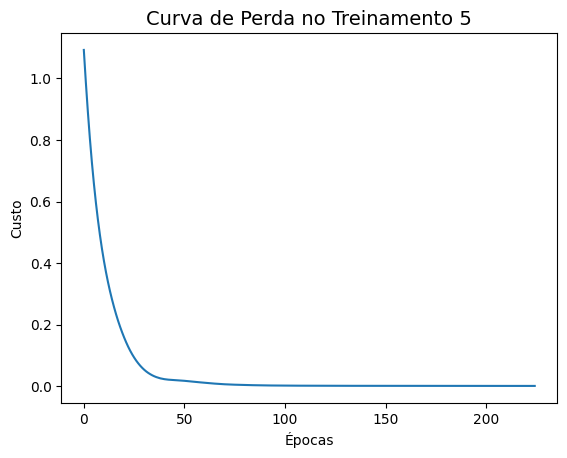

Treinamento: 5
Neurônios:  10
Ativação:  relu
Perda Final:  0.000606624868133049
Número de Épocas:  225


In [67]:
# Criando o modelo MLPRegressor com 10 neurônios na camada oculta, função de ativação ReLU,
# otimizador Adam, taxa de regularização alpha de 0.01, máximo de 1000 iterações, taxa de aprendizagem inicial de 0.01,
# tolerância de 0.0001 para a convergência, momentum de 0.9, parada antecipada habilitada, epsilon de 1e-06 para a melhoria mínima
# no treinamento, máximo de 10 épocas sem melhoria para parar o treinamento, e estado aleatório fixo em 12.

mlpr_5 = MLPRegressor(hidden_layer_sizes=(10,), activation='relu', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_5.fit(x, y) # Treinando o modelo com os dados de entrada x e saída y

plt.plot(mlpr_5.loss_curve_)
plt.title("Curva de Perda no Treinamento 5", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

print("Treinamento: 5")
print("Neurônios: ", mlpr_5.hidden_layer_sizes[0])
print("Ativação: ", mlpr_5.activation)
print("Perda Final: ", mlpr_5.loss_)
print("Número de Épocas: ", mlpr_5.n_iter_)

In [68]:
mlpr_6 = MLPRegressor(hidden_layer_sizes=(15,), activation='relu', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_6.fit(x, y)

print("Treinamento: 6")
print("Neurônios: ", mlpr_6.hidden_layer_sizes[0])
print("Ativação: ", mlpr_6.activation)
print("Perda Final: ", mlpr_6.loss_)
print("Número de Épocas: ", mlpr_6.n_iter_)

Treinamento: 6
Neurônios:  15
Ativação:  relu
Perda Final:  0.0032926441261320076
Número de Épocas:  21


In [69]:
mlpr_7 = MLPRegressor(hidden_layer_sizes=(5,), activation='logistic', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_7.fit(x, y)

print("Treinamento: 7")
print("Neurônios: ", mlpr_7.hidden_layer_sizes[0])
print("Ativação: ", mlpr_7.activation)
print("Perda Final: ", mlpr_7.loss_)
print("Número de Épocas: ", mlpr_7.n_iter_)

Treinamento: 7
Neurônios:  5
Ativação:  logistic
Perda Final:  0.0007432137504136059
Número de Épocas:  126


In [70]:
mlpr_8 = MLPRegressor(hidden_layer_sizes=(10,), activation='logistic', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_8.fit(x, y)

print("Treinamento: 8")
print("Neurônios: ", mlpr_8.hidden_layer_sizes[0])
print("Ativação: ", mlpr_8.activation)
print("Perda Final: ", mlpr_8.loss_)
print("Número de Épocas: ", mlpr_8.n_iter_)

Treinamento: 8
Neurônios:  10
Ativação:  logistic
Perda Final:  0.01957026215706161
Número de Épocas:  29


In [71]:
mlpr_9 = MLPRegressor(hidden_layer_sizes=(15,), activation='logistic', solver='adam', alpha=0.01,
                       max_iter=1000, learning_rate_init=0.01, tol=0.0001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       n_iter_no_change=10, random_state=12)
mlpr_9.fit(x, y)

print("Treinamento: 9")
print("Neurônios: ", mlpr_9.hidden_layer_sizes[0])
print("Ativação: ", mlpr_9.activation)
print("Perda Final: ", mlpr_9.loss_)
print("Número de Épocas: ", mlpr_9.n_iter_)

Treinamento: 9
Neurônios:  15
Ativação:  logistic
Perda Final:  0.0009612734759292477
Número de Épocas:  41


**Planilha com os resultados das configurações - Questão 1**

In [72]:
# Dados dos treinamentos
data = {
    'Treinamento': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'Neurônios': [5, 10, 15, 5, 10, 15, 5, 10, 15],
    'Ativação': ['tanh', 'tanh', 'tanh', 'relu', 'relu', 'relu', 'logistic', 'logistic', 'logistic'],
    'Perda Final': [0.011279827862555715, 0.018799317044292635, 0.010658133923811172, 0.001431905824437742, 0.000606624868133049, 0.0032926441261320076, 0.0007432137504136059, 0.01957026215706161, 0.0009612734759292477],
    'Número de Épocas': [46, 39, 23, 366, 225, 21, 126, 29, 41],
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Ordenando pelo número do treinamento
df = df.sort_values('Treinamento')

# Adicionando a coluna de Ranking da Melhor Configuração
df['Ranking da Melhor Configuração'] = df['Perda Final'].rank()

# Exibindo a tabela
df


,Treinamento,Neurônios,Ativação,Perda Final,Número de Épocas,Ranking da Melhor Configuração
0,1,5,tanh,0.011280,46,7.0
1,2,10,tanh,0.018799,39,8.0
2,3,15,tanh,0.010658,23,6.0
3,4,5,relu,0.001432,366,4.0
4,5,10,relu,0.000607,225,1.0
5,6,15,relu,0.003293,21,5.0
6,7,5,logistic,0.000743,126,2.0
7,8,10,logistic,0.019570,29,9.0
8,9,15,logistic,0.000961,41,3.0


In [54]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab_Notebooks/MLP_RegressorRessonancia_MW.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab_Notebooks/MLP_RegressorRessonancia_MW.ipynb to html
[NbConvertApp] Writing 807844 bytes to /content/drive/MyDrive/Colab_Notebooks/MLP_RegressorRessonancia_MW.html
